       name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)  


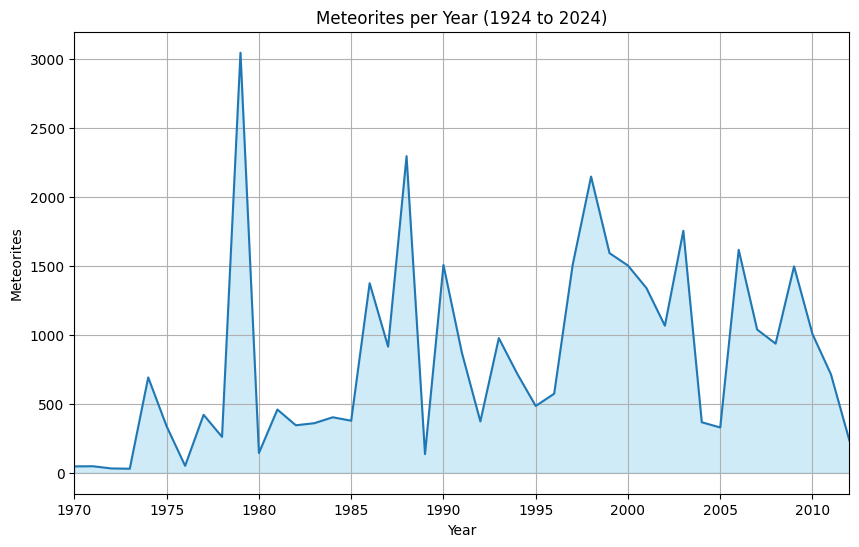

In [46]:
!pip install matplotlib seaborn numpy pandas

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load CSV file, skipping any lines with issues
try:
    df = pd.read_csv('../data/raw/Meteorite_Landings.csv', on_bad_lines='skip')
except Exception as e:
    print(f"Error loading file: {e}")
    
print(df.head())
df = df.dropna()
df.to_csv('../data/processed/cleaned_meteorite_data.csv', index=False)



# Define the range of years to include in the plot
start_year = 1970
end_year = 2012

# Filter the data to include only years from 1924 to 2024
df_filtered = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

# Count the number of entries per year and sort by year
year_counts = df_filtered['year'].value_counts().sort_index()

# Create a Series with all years in the specified range, initialized to 0
all_years = pd.Series(0, index=range(start_year, end_year + 1))

# Add the actual year counts to this Series, filling missing years with 0
year_counts = all_years.add(year_counts, fill_value=0)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Meteorites')
plt.title('Meteorites per Year (1924 to 2024)')
plt.fill_between(year_counts.index, year_counts.values, color='skyblue', alpha=0.4)
plt.grid(True)

# Set the x-axis range to 1924 to 2024
plt.xlim(start_year, end_year)

plt.show()
